In [11]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

'5'

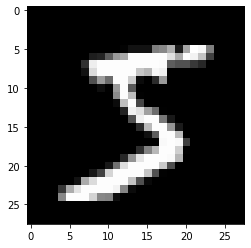

In [43]:
import numpy as np
#print(np.array(mnist.data.loc[0]))
import matplotlib.pyplot as plt
plt.imshow(np.array(mnist.data.loc[0]).reshape(28,28), cmap='gray')
mnist.target[0]

In [12]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
train_lbl[0:10]
train_img.shape

(60000, 784)

In [13]:
from tensorflow.keras.utils import to_categorical
train_onehot_lbl = to_categorical(train_lbl,num_classes=10)
test_onehot_lbl = to_categorical(test_lbl,num_classes=10)
train_onehot_lbl[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
hidden_layer = Dense(30,activation="sigmoid")(input_layer)
dense_layer = Dense(10, activation="softmax")(hidden_layer)

model = Model(inputs=input_layer, outputs=dense_layer)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 20, batch_size=20)


Epoch 1/20
3000/3000 [==============================] - 8s 2ms/step - loss: 0.7576 - accuracy: 0.7986 - val_loss: 0.5113 - val_accuracy: 0.8593
Epoch 2/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4532 - accuracy: 0.8681 - val_loss: 0.4428 - val_accuracy: 0.8708
Epoch 3/20
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4132 - accuracy: 0.8779 - val_loss: 0.4447 - val_accuracy: 0.8693
Epoch 4/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3936 - accuracy: 0.8816 - val_loss: 0.4132 - val_accuracy: 0.8729
Epoch 5/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3914 - accuracy: 0.8809 - val_loss: 0.4124 - val_accuracy: 0.8749
Epoch 6/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3765 - accuracy: 0.8860 - val_loss: 0.3708 - val_accuracy: 0.8881
Epoch 7/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3501 - accuracy: 0.8951 - val_loss: 0.3711 - val_accuracy:

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_layer = Input(shape=(784,))
dense_layer1 = Dense(100,activation="sigmoid")(input_layer) 
dense_layer2 = Dense(80,activation="sigmoid")(dense_layer1)
dense_layer3 = Dense(50,activation="sigmoid")(dense_layer2)
dense_layer4 = Dense(10, activation="softmax")(dense_layer3)  

model = Model(inputs=input_layer, outputs=dense_layer4)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])

model.summary()

model.fit(train_img,train_onehot_lbl,validation_data=(test_img,test_onehot_lbl), epochs= 5, batch_size=10)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 80)                8080      
                                                                 
 dense_10 (Dense)            (None, 50)                4050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 91,140
Trainable params: 91,140
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
6000/6000 [==============================] - 

In [16]:
model.predict(test_img[0:2])

array([[1.57891050e-01, 2.59658318e-05, 6.18824409e-03, 7.77067384e-04,
        1.87009238e-02, 1.07274674e-01, 7.04766512e-01, 1.17262804e-04,
        3.34208529e-03, 9.16229270e-04],
       [1.66481313e-05, 7.03979936e-07, 1.44891703e-04, 4.54619403e-05,
        9.97319281e-01, 3.61767859e-04, 5.98431725e-05, 4.64277546e-04,
        1.20155119e-05, 1.57518091e-03]], dtype=float32)